<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


## Task 2: Generate Descriptive Statistics and Visualizations

#### For all visualizations, please include a title in each graph and appropriate labels

#### Generate the following and explain your findings:

#### For the "Median value of owner-occupied homes" provide a boxplot

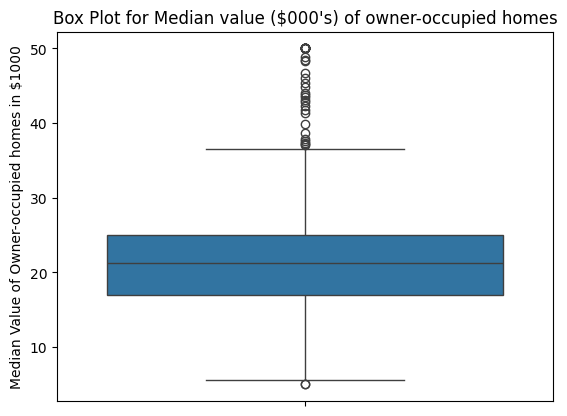

In [6]:
#Creating the box plot for MEDV

fig = sns.boxplot(y="MEDV", data=boston_df)
plt.title("Box Plot for Median value ($000's) of owner-occupied homes")
plt.ylabel("Median Value of Owner-occupied homes in $1000")
plt.show()


Conclusion: Median value of Owner-occupied homes is around $20000. We can also see that there is a number of outliers that we can explore and decide to leave it or to clean.

#### Provide a  bar plot for the Charles river variable

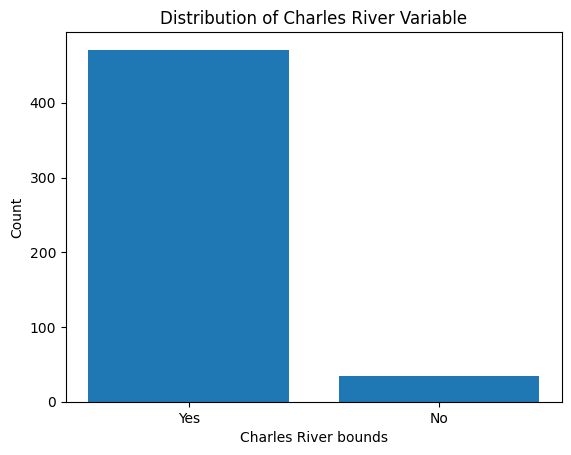

In [7]:
# create a bar plot for the Charles river variable
plt.bar(['Yes', 'No'], boston_df['CHAS'].value_counts())

# add labels and title
plt.xlabel('Charles River bounds')
plt.ylabel('Count')
plt.title('Distribution of Charles River Variable')

# show the plot
plt.show()

Conclusion: Majority of houses are bounded by the river

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [8]:
#divide by groups
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = ' 35 - 70 '
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 and older'
print(boston_df.head())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV     age_group  
0  296.0     15.3   4.98  24.0      35 - 70   
1  242.0     17.8   9.14  21.6  70 and older  
2  242.0     17.8   4.03  34.7      35 - 70   
3  222.0     18.7   2.94  33.4      35 - 70   
4  222.0     18.7   5.33  36.2      35 - 70   


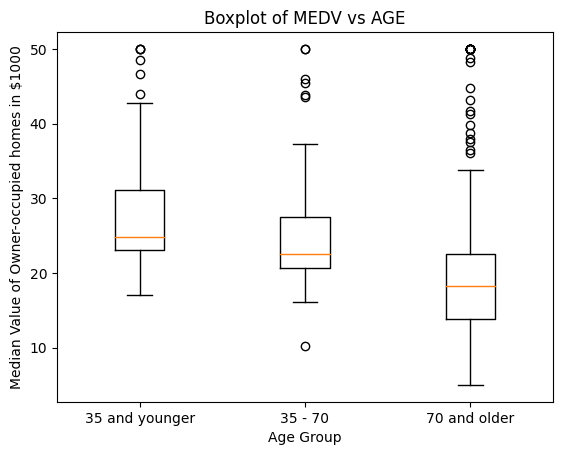

In [9]:
# create a boxplot for MEDV vs AGE

plt.boxplot([boston_df[boston_df['AGE'] <= 35]['MEDV'],
             boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV'],
             boston_df[boston_df['AGE'] >= 70]['MEDV']],
            labels=['35 and younger', '35 - 70', '70 and older'])

# set the title and axes labels
plt.title('Boxplot of MEDV vs AGE')
plt.xlabel('Age Group')
plt.ylabel("Median Value of Owner-occupied homes in $1000")

# show the plot
plt.show()



Conclusion: Older houses have less value

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Text(0.5, 1.0, 'Relationship between INDUS vs NOX')

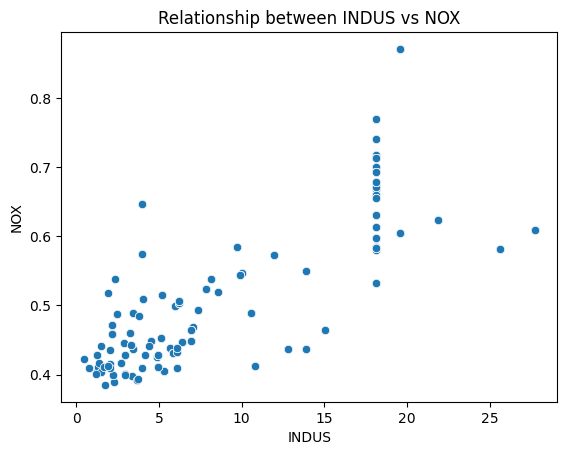

In [10]:
ax = sns.scatterplot(boston_df, x = 'INDUS', y = 'NOX')
ax.set_title('Relationship between INDUS vs NOX')

Explanation: Positive correlation between INDUS and NOX

#### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Histogram of Pupil to Teacher Ratio')

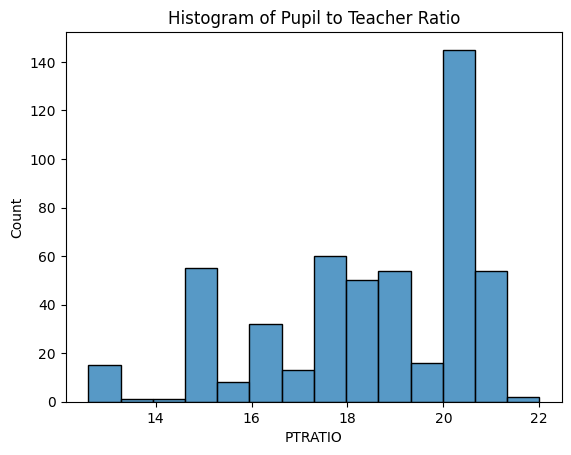

In [11]:
ax = sns.histplot(boston_df, x = 'PTRATIO')
ax.set_title('Histogram of Pupil to Teacher Ratio')

Explanation: the PTRATIO is a left skewed distribution. The mode is around the 20 bin. The median is between 18 and 20. Mean is less than median.

## Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions, be sure to:
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

#### For each of the following questions;

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [12]:
print('Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river')
print('Alternate Hypothesis: There is significant difference in median value of houses bounded by the Charles river')

Null Hypothesis: There is no significant difference in median value of houses bounded by the Charles river
Alternate Hypothesis: There is significant difference in median value of houses bounded by the Charles river


Text(0.5, 1.0, 'Hitogram of MEDV by CHAS')

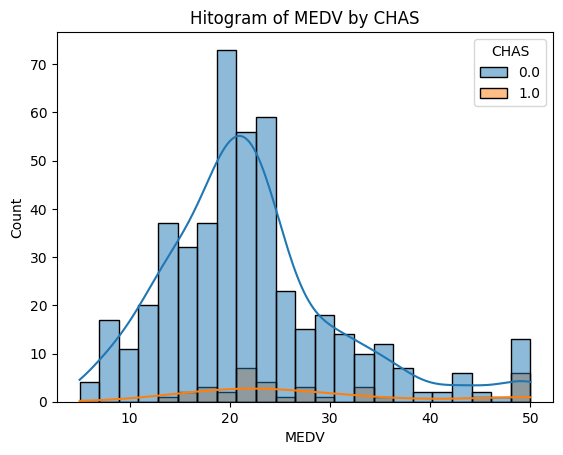

In [13]:
g = sns.histplot(boston_df, x='MEDV', hue = 'CHAS', kde = True)
g.set_title('Hitogram of MEDV by CHAS')

In [14]:
print('Beacuase the distribution is lightly tailed symmetry so choosing center=mean for levene test')
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], center = 'mean')

Beacuase the distribution is lightly tailed symmetry so choosing center=mean for levene test


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [15]:
print("The variances are not equal. Thus perform Welch's t test")
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

The variances are not equal. Thus perform Welch's t test


TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [19]:
print('Since pvalue less than 0.05, we can reject the null hypothesis (H0). Hence, there is significant difference in median values of house if the house is situated on tract of Charles river or not')

Since pvalue less than 0.05, we can reject the null hypothesis (H0). Hence, there is significant difference in median values of house if the house is situated on tract of Charles river or not


#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

H0 - There is no significant difference in median values of Age groups of  houses for each proportion of owner-occupied units built prior to 1940.\
H1 - There is significant difference in median valuesof Age groups of of houses for each proportion of owner-occupied units built prior to 1940.

In [24]:
#set the age groups
age_35_and_younger = boston_df[boston_df['age_group'] == '35 and younger']['MEDV']
age_35_70 = boston_df[boston_df['age_group'] == '35-70']['MEDV']
age_70_and_older = boston_df[boston_df['age_group'] == '70 and older']['MEDV']

In [25]:
#create a linear model with MEDV as the response variable and age_groups as the predictor variable
model = ols('MEDV ~ C(age_group)', data = boston_df).fit()
# perform ANOVA on the model
anova_table= sm.stats.anova_lm(model)
# print the ANOVA table
print(anova_table)

                 df        sum_sq      mean_sq         F        PR(>F)
C(age_group)    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual      503.0  37314.563532    74.184023       NaN           NaN


P value =1.710501e-15<0.05. We accept H1. 
There is significant difference in means of median values of houses for Age groups of owner-occupied units built prior to 1940.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H0: Nitric oxide concentration is not correlated to non-retial business acres per town 

H1: Nitric oxide concentration is correlated to non-retial business acres per town

In [26]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Answer: Since the P-value is less than alpha (0.05), we reject the null hypothesis and conclude that there is correlation between Nitric Oxide conentration with the acres of non-retail business

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.\
H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [28]:
#setting variables
X=boston_df['DIS']
Y=boston_df['MEDV']
# Add a constant term to the independent variables, allow the regression line to have an intercept point with the y-axis, even when the independent variables are zero.
X = sm.add_constant(X) 
# Fit the linear regression model
model = sm.OLS(Y, X)
results = model.fit()

# Print the summary of the regression analysis
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           1.21e-08
Time:                        12:31:46   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

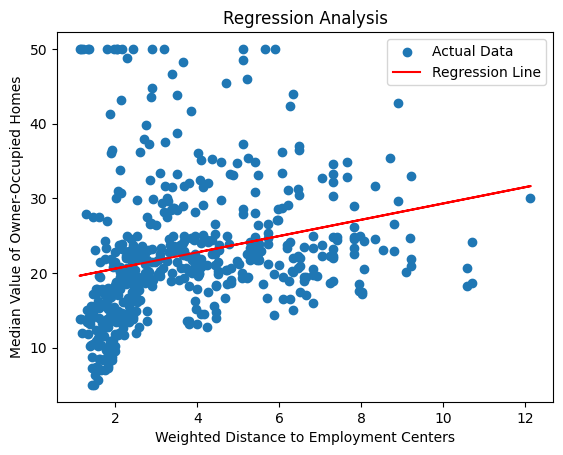

In [29]:
# Plotting the regression line and data points
plt.scatter(X['DIS'], Y, label='Actual Data')
plt.plot(X['DIS'], results.fittedvalues, color='red', label='Regression Line')
plt.xlabel('Weighted Distance to Employment Centers')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.title('Regression Analysis')
plt.legend()
plt.show()

Conclusion: The F-statistic is 33.58, with a corresponding p-value of 1.21e-08.

We accept H1 \
There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.
The p-values for the coefficients of both the constant term and DIS are close to zero, suggesting that they are statistically significant. We conclude that there is strong evidence to suggest that both the constant term and the weighted distance variable have a significant impact on the median value of owner-occupied homes.